In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec

# # Set parameters
# a = 1  # Motion distance
# T = 1  # Time interval

# # Create frequency axis (only u ≥ 0)
# u = np.linspace(0, 10, 500)  # Only positive frequencies

# # Calculate PSF function
# def H(u, a, T):
#     result = np.zeros_like(u, dtype=complex)
#     # Handle non-zero frequencies
#     mask = u != 0
#     result[mask] = T * np.sin(np.pi * u[mask] * a) / (np.pi * u[mask] * a) * np.exp(-1j * np.pi * u[mask] * a)
#     # Handle zero frequency (limit is T)
#     result[~mask] = T
#     return result

# # Calculate PSF function
# H_values = H(u, a, T)

# # Set figure size
# plt.figure(figsize=(12, 10))
# gs = GridSpec(2, 2, height_ratios=[1, 1])

# # Plot magnitude response |H(u)|
# ax1 = plt.subplot(gs[0, :])
# ax1.plot(u, np.abs(H_values), 'b-', linewidth=2)
# ax1.set_title('Magnitude Response |H(u)|', fontsize=14)
# ax1.set_xlabel('Frequency u', fontsize=12)
# ax1.set_ylabel('Magnitude', fontsize=12)
# ax1.grid(True)

# # Plot phase response angle(H(u))
# ax2 = plt.subplot(gs[1, 0])
# ax2.plot(u, np.angle(H_values), 'r-', linewidth=2)
# ax2.set_title('Phase Response angle(H(u))', fontsize=14)
# ax2.set_xlabel('Frequency u', fontsize=12)
# ax2.set_ylabel('Phase (rad)', fontsize=12)
# ax2.grid(True)

# # Plot spatial domain PSF (rectangular function)
# ax3 = plt.subplot(gs[1, 1])
# x = np.linspace(0, 3*a, 500)  # Only non-negative positions
# psf = np.zeros_like(x)
# psf[(x >= 0) & (x <= a)] = T/a
# ax3.plot(x, psf, 'g-', linewidth=2)
# ax3.set_title('Spatial Domain Point Spread Function', fontsize=14)
# ax3.set_xlabel('Spatial Position x', fontsize=12)
# ax3.set_ylabel('Intensity', fontsize=12)
# ax3.grid(True)

# plt.tight_layout()
# plt.show()

# # 3D visualization of PSF
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Create 2D grid (only u ≥ 0)
# u = np.linspace(0, 5, 100)  # Only positive frequencies
# v = np.linspace(-5, 5, 100)
# u_grid, v_grid = np.meshgrid(u, v)

# # Calculate 2D PSF (only depends on u)
# H_2d = np.zeros_like(u_grid, dtype=complex)
# for i in range(len(v)):
#     H_2d[i, :] = H(u, a, T)

# # Plot 3D surface
# surf = ax.plot_surface(u_grid, v_grid, np.abs(H_2d), cmap='viridis', alpha=0.8)
# ax.set_title('2D Frequency Domain PSF Magnitude Response |H(u,v)|', fontsize=14)
# ax.set_xlabel('Frequency u', fontsize=12)
# ax.set_ylabel('Frequency v', fontsize=12)
# ax.set_zlabel('Magnitude', fontsize=12)
# fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.tight_layout()
# plt.show()

In [2]:
from utils.rotation import Rotation
from utils.noise import Noise

import matplotlib.pyplot as plt
from PIL import Image


import numpy as np
from pprint import pprint

lena_path = "../pics/Lena.bmp"

img = Image.open(lena_path).convert("RGB")
lena_img = np.array(img)

wsdr_path = "../pics/wsdr.jpg"
img = Image.open(wsdr_path).convert("RGB")
wsdr_img = np.array(img)


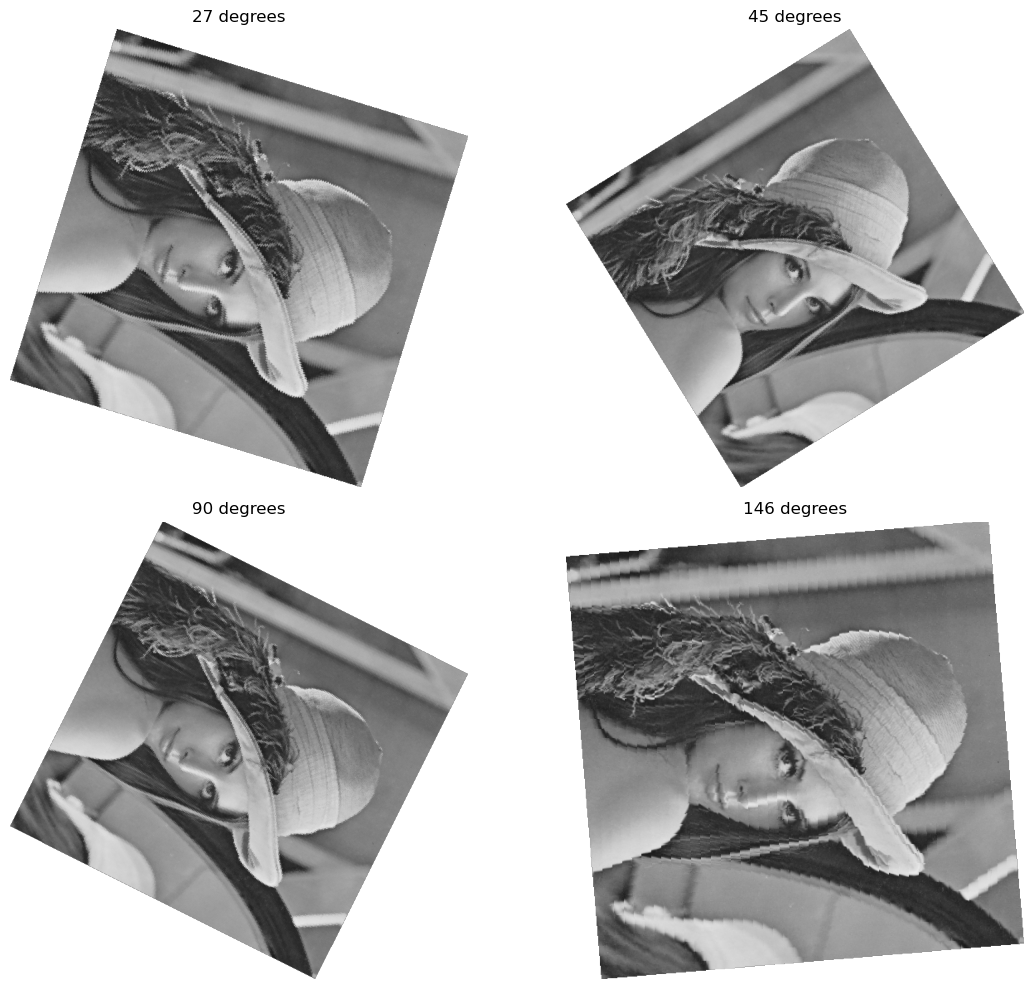

In [17]:
roat = Rotation(a=-0.01,num=1000000)
lena_img_rotated_27 = roat.reverse_map(angle=27, image=lena_img)
lena_img_rotated_45 = roat.reverse_map(angle=45, image=lena_img)
lena_img_rotated_90 = roat.reverse_map(angle=90, image=lena_img)
lena_img_rotated_146 = roat.reverse_map(angle=146, image=lena_img)

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.imshow(lena_img_rotated_27)
plt.title("27 degrees")
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(lena_img_rotated_45)
plt.title("45 degrees")
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(lena_img_rotated_90)
plt.title("90 degrees")
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(lena_img_rotated_146)
plt.title("146 degrees")
plt.axis("off")
plt.tight_layout()
plt.show()


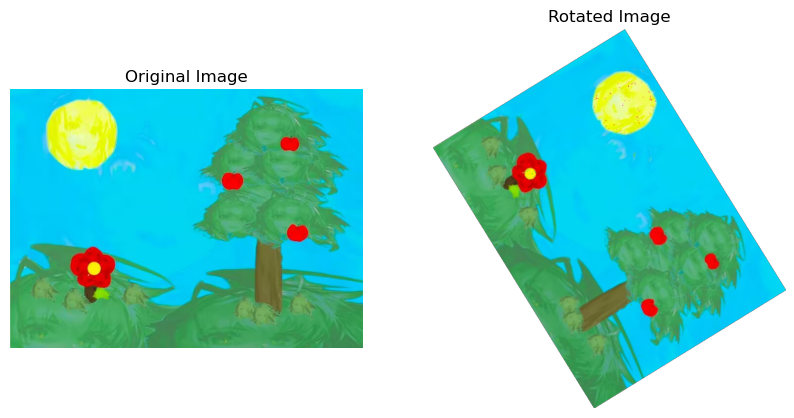

In [11]:
roat = Rotation(a = -0.01,num=1000000)
wsdr_img_rotated = roat.reverse_map(angle=45, image=wsdr_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(wsdr_img)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Rotated Image")
plt.imshow(wsdr_img_rotated)
plt.axis("off")
plt.show()